# Euchre Trick Model
Model to estimate the number of tricks a given hand will be able to take  
(or maybe the percent likelihood of each number of tricks taken 0-5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load in training data

In [12]:
pwd

'C:\\Users\\jerem\\Desktop\\nonsense\\euchre'

In [13]:
# raw_train_df = pd.read_csv('all_hand_results.csv')
raw_train_df = pd.read_csv('C:\\Users\\jerem\\Desktop\\nonsense\\euchre\\all_hand_results.csv')

In [14]:
raw_train_df.shape

(476716, 16)

In [15]:
raw_train_df.head()

,tricks_won,is_calling_player,teammate_called,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,has_Ttrump,has_9trump,num_off_A,num_off_K,num_off_Q,num_suits,partner_tricks,player_seat
0,2,1,0,1,0,0,0,0,1,1,0,1,0,2,1,4
1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,2,1
2,1,0,1,0,1,0,1,0,0,0,0,0,1,2,2,2
3,2,0,0,0,0,0,0,1,0,0,1,1,1,3,0,3
4,3,1,0,1,0,0,1,0,1,0,0,0,1,2,0,2


<AxesSubplot:>

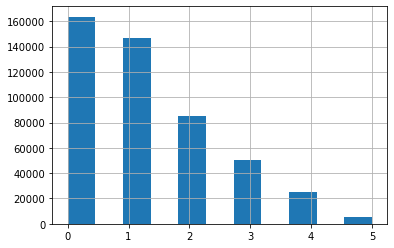

In [16]:
raw_train_df['tricks_won'].hist(bins=11)

#### Features

In [17]:
raw_train_df['team_tricks_won'] = raw_train_df['partner_tricks'] + raw_train_df['tricks_won']

In [18]:
def make_player_seat_categorical(df):
    """
    Function to transform player seat field into categorical columns from given df
    """
    df['player_seat1'] = np.where(df['player_seat']==1,1,0)
    df['player_seat2'] = np.where(df['player_seat']==2,1,0)
    df['player_seat3'] = np.where(df['player_seat']==3,1,0)
    df['player_seat4'] = np.where(df['player_seat']==4,1,0)
    return df

In [19]:
raw_train_df = make_player_seat_categorical(raw_train_df)

In [20]:
raw_train_df.head()

,tricks_won,is_calling_player,teammate_called,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,has_Ttrump,has_9trump,...,num_off_K,num_off_Q,num_suits,partner_tricks,player_seat,team_tricks_won,player_seat1,player_seat2,player_seat3,player_seat4
0,2,1,0,1,0,0,0,0,1,1,...,1,0,2,1,4,3,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,1,2,1,0,0,0
2,1,0,1,0,1,0,1,0,0,0,...,0,1,2,2,2,3,0,1,0,0
3,2,0,0,0,0,0,0,1,0,0,...,1,1,3,0,3,2,0,0,1,0
4,3,1,0,1,0,0,1,0,1,0,...,0,1,2,0,2,3,0,1,0,0


### Create train/test/validation splits

In [21]:
model_features = ['has_right', 'has_left',
                  'has_Atrump', 'has_Ktrump', 'has_Qtrump', 'has_Ttrump', 'has_9trump', 
                  'num_off_A', 'num_off_K', 'num_off_Q', 'num_suits', 
                  'player_seat1', 'player_seat2', 'player_seat3', 'player_seat4'
                 ]

In [26]:
TEST_SIZE = 0.2
VALID_SIZE = 0.1

In [27]:
train_df, test_valid_df, train_targets_df, test_valid_targets_df = train_test_split(raw_train_df[model_features], 
                                                                        raw_train_df['tricks_won'], 
                                                                        test_size=(TEST_SIZE+VALID_SIZE), 
                                                                        random_state=123)

In [28]:
test_df, valid_df, test_targets_df, valid_targets_df = train_test_split(test_valid_df, 
                                                                        test_valid_targets_df, 
                                                                        test_size=(TEST_SIZE/(VALID_SIZE+TEST_SIZE)), 
                                                                        random_state=123)

In [29]:
print(test_df.shape)
print(test_targets_df.shape)
print(valid_df.shape)
print(valid_targets_df.shape)
print(train_df.shape)
print(train_targets_df.shape)

(47671, 15)
(47671,)
(95344, 15)
(95344,)
(333701, 15)
(333701,)


#### Scale Features

In [31]:
# sc = StandardScaler()
# train_df = sc.fit_transform(train_df)
# test_df = sc.transform(test_df)
# valid_df = sc.transform(valid_df)

In [32]:
sc = StandardScaler()
train_scaled_df = sc.fit_transform(train_df)
test_scaled_df = sc.transform(test_df)
valid_scaled_df = sc.transform(valid_df)

## Modeling

#### Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
reg = LinearRegression().fit(train_scaled_df, train_targets_df)

In [74]:
train_df.columns

Index(['has_right', 'has_left', 'has_Atrump', 'has_Ktrump', 'has_Qtrump',
       'has_Ttrump', 'has_9trump', 'num_off_A', 'num_off_K', 'num_off_Q',
       'num_suits', 'player_seat1', 'player_seat2', 'player_seat3',
       'player_seat4'],
      dtype='object')

In [75]:
reg.coef_

array([ 6.62599824e-01,  3.66137465e-01,  2.11619604e-01,  3.27775265e-01,
        3.03684953e-01,  2.81805136e-01,  2.53954059e-01,  1.86141801e-01,
        2.28721184e-01,  2.94627608e-02, -1.76811157e-01,  4.29177748e+11,
        4.28978106e+11,  4.29629017e+11,  4.29853086e+11])

In [76]:
for coef in range(len(reg.coef_)):
    print(f'{train_df.columns[coef]}: {reg.coef_[coef]}')

has_right: 0.6625998241730906
has_left: 0.3661374646486056
has_Atrump: 0.21161960390172788
has_Ktrump: 0.32777526504538207
has_Qtrump: 0.3036849532577626
has_Ttrump: 0.28180513575128147
has_9trump: 0.25395405908079927
num_off_A: 0.18614180079430268
num_off_K: 0.22872118401560732
num_off_Q: 0.029462760750361187
num_suits: -0.1768111570515248
player_seat1: 429177747874.2324
player_seat2: 428978105688.2042
player_seat3: 429629016825.6355
player_seat4: 429853086411.8607


In [77]:
reg.score(train_df, train_targets_df)

-1.2006229735867367e+23

In [78]:
reg.score(test_df, test_targets_df)

-1.1768000347908085e+23

In [79]:
test_preds = reg.predict(test_df)
test_preds[0:5]

array([4.29177748e+11, 4.29853086e+11, 4.29853086e+11, 4.29629017e+11,
       4.29629017e+11])

In [80]:
test_preds_rounded = [round(pred) for pred in test_preds]
test_preds_rounded[0:5]

[429177747876, 429853086413, 429853086413, 429629016828, 429629016827]

In [81]:
plot_trick_error_rates(targets_list = test_targets_df, 
                       preds_list=test_preds_rounded)

KeyError: '429177747874'

In [82]:
valid_preds_linreg = reg.predict(valid_df)

In [83]:
valid_preds_linreg_rounded = [round(pred) for pred in valid_preds_linreg]

In [84]:
plot_trick_error_rates(targets_list = valid_targets_df, 
                       preds_list=valid_preds_linreg_rounded)

KeyError: '429177747875'

#### Test single hand manually

In [85]:
hand = {feature:[0] for feature in model_features}
single_hand_test_df = pd.DataFrame(hand)
single_hand_test_df

,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,has_Ttrump,has_9trump,num_off_A,num_off_K,num_off_Q,num_suits,player_seat1,player_seat2,player_seat3,player_seat4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
single_hand_test_df['player_seat1'] = 1
single_hand_test_df['player_seat2'] = 0
single_hand_test_df['player_seat3'] = 0
single_hand_test_df['player_seat4'] = 0
single_hand_test_df['has_right'] = 0
single_hand_test_df['has_left'] = 0
single_hand_test_df['has_Atrump'] = 0
single_hand_test_df['has_Ktrump'] = 1
single_hand_test_df['has_Qtrump'] = 1
single_hand_test_df['has_Ttrump'] = 1
single_hand_test_df['has_9trump'] = 0
single_hand_test_df['num_off_Q'] = 2
single_hand_test_df['num_off_K'] = 0
single_hand_test_df['num_off_A'] = 0

In [87]:
single_test_pred = reg.predict(single_hand_test_df)
single_test_pred

array([4.29177748e+11])

### Regularized linear regression

#### Ridge

In [88]:
from sklearn.linear_model import Ridge

In [89]:
ridge = Ridge(alpha=0.9).fit(train_df, train_targets_df)

In [90]:
ridge.score(test_df, test_targets_df)

0.705794665276191

In [91]:
ridge.coef_

array([ 1.58878285e+00,  8.55754154e-01,  7.12424024e-01,  7.68702439e-01,
        7.12343020e-01,  6.60766522e-01,  5.94974100e-01,  5.36758362e-01,
        3.17947465e-01,  4.08188285e-02, -2.73511438e-01, -1.44063939e-03,
       -9.63980045e-03,  1.79318884e-02, -6.85144912e-03])

#### Lasso

In [92]:
from sklearn.linear_model import Lasso

In [93]:
lasso = Lasso(alpha=0.01).fit(train_df, train_targets_df)

In [94]:
lasso.score(test_df, test_targets_df)

0.699770554106395

In [95]:
sum(lasso.coef_ != 0)

10

In [96]:
lasso.coef_

array([ 1.51421319,  0.74799629,  0.55761191,  0.69523901,  0.63886285,
        0.58679532,  0.52100525,  0.39199334,  0.24729915, -0.        ,
       -0.27923317, -0.        , -0.        ,  0.        , -0.        ])

#### ElasticNet

In [97]:
from sklearn.linear_model import ElasticNet

In [98]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(train_df, train_targets_df)

In [99]:
elastic_net.score(test_df, test_targets_df)

0.7023803392389232

#### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
classifier =  RandomForestClassifier(
    n_estimators=30, 
    max_features=0.9,
    max_depth=5,
    criterion = 'entropy', 
    verbose=0
)

In [102]:
%%time

classifier.fit(train_df, train_targets_df)  # Fit the model

Wall time: 11 s


RandomForestClassifier(criterion='entropy', max_depth=5, max_features=0.9,
                       n_estimators=30)

In [103]:
test_preds = classifier.predict(test_df)
# test_preds = classifier.predict_proba(test_df)
test_preds[0:3]

array([1, 0, 0], dtype=int64)

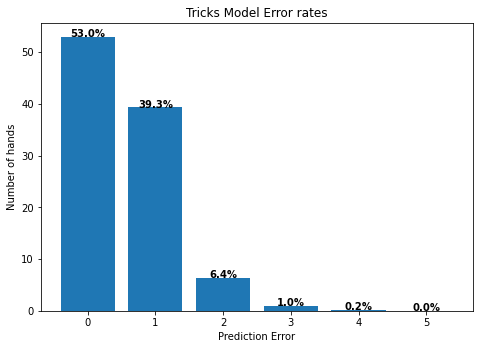

In [104]:
plot_trick_error_rates(targets_list = test_targets_df, 
                       preds_list=test_preds)

In [105]:
single_hand_preds = classifier.predict_proba(single_hand_test_df)
single_hand_preds

array([[0.02029555, 0.18586077, 0.43231851, 0.29498943, 0.055229  ,
        0.01130675]])

In [106]:
trick_preds = single_hand_preds.tolist()[0]
trick_preds

[0.02029554642881738,
 0.18586077324314643,
 0.4323185054939875,
 0.29498942641095954,
 0.05522900133459952,
 0.011306747088489591]

In [107]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)

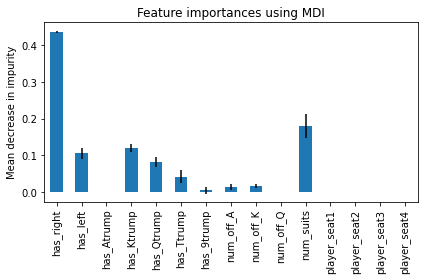

In [108]:
forest_importances = pd.Series(importances, index=model_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### GBM

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
gbm_clf = GradientBoostingClassifier(learning_rate=0.1, 
                                     n_estimators=10, 
                                     #subsample=0.9, 
                                     #max_depth=6
                                    )

#### Fit the model

In [111]:
%%time

gbm_clf.fit(train_df, train_targets_df)

Wall time: 27 s


GradientBoostingClassifier(n_estimators=10)

In [112]:
# Create test preds
test_preds = gbm_clf.predict(test_df)
#test_preds = gbm_clf.predict_proba(test_df)
test_preds[0:3]

array([1, 0, 0], dtype=int64)

In [113]:
single_hand_preds = gbm_clf.predict_proba(single_hand_test_df)
single_hand_preds

array([[0.13896767, 0.17065973, 0.2070718 , 0.22679959, 0.24971621,
        0.006785  ]])

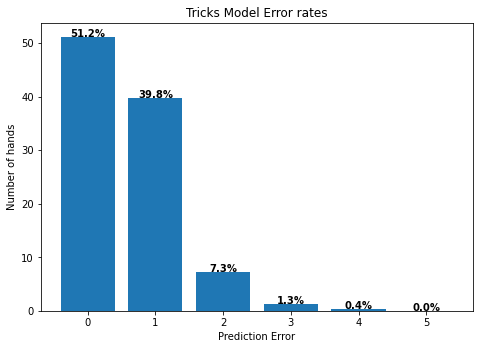

In [114]:
plot_trick_error_rates(targets_list = test_targets_df, 
                       preds_list=test_preds)

In [115]:
importances = gbm_clf.feature_importances_

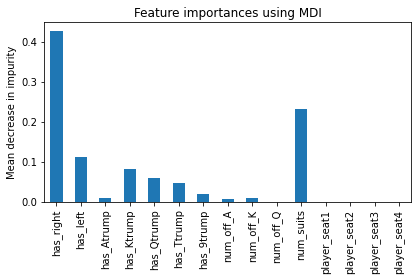

In [116]:
forest_importances = pd.Series(importances, index=model_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = {'n_estimators':[10], 'max_depth':[4,5], 'subsample':[0.5]}

In [66]:
clf = GridSearchCV(gbm_clf, grid_params)

NameError: name 'GridSearchCV' is not defined

In [56]:
%%time

clf.fit(train_df, train_targets_df)

Wall time: 4min 52s


GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_depth=4,
                                                  min_samples_leaf=5,
                                                  min_samples_split=5,
                                                  n_estimators=20,
                                                  subsample=0.9),
             param_grid={'max_depth': [3, 4], 'n_estimators': [10]})

In [57]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [58]:
clf.cv_results_

{'mean_fit_time': array([23.340521  , 29.31427464]),
 'std_fit_time': array([1.4437754 , 0.84339859]),
 'mean_score_time': array([0.10651946, 0.15212078]),
 'std_score_time': array([0.00625487, 0.03002014]),
 'param_max_depth': masked_array(data=[3, 4],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 10],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'n_estimators': 10},
  {'max_depth': 4, 'n_estimators': 10}],
 'split0_test_score': array([0.37341891, 0.39672824]),
 'split1_test_score': array([0.37237007, 0.39520977]),
 'split2_test_score': array([0.37205698, 0.38955855]),
 'split3_test_score': array([0.37294928, 0.39500626]),
 'split4_test_score': array([0.37297077, 0.39609261]),
 'mean_test_score': array([0.3727532 , 0.39451909]),
 'std_test_score': array([0.00048176, 0.00255647]),
 'rank_test_score': array([2, 1])}

In [59]:
clf.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=10, subsample=0.9)

In [60]:
clf.best_estimator_.predict_proba(single_hand_test_df)

array([[0.30894421, 0.31107893, 0.20487216, 0.11204268, 0.05184747,
        0.01121455]])

In [61]:
single_hand_preds = clf.predict_proba(single_hand_test_df)
single_hand_preds

array([[0.30894421, 0.31107893, 0.20487216, 0.11204268, 0.05184747,
        0.01121455]])

In [64]:
test_preds = clf.best_estimator_.predict(test_df)

In [81]:
importances = clf.best_estimator_.feature_importances_

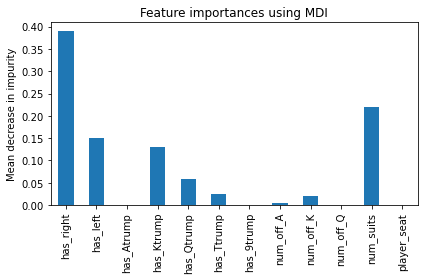

In [82]:
forest_importances = pd.Series(importances, index=model_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Save out model to disk using joblib

In [ ]:
import joblib

In [ ]:
pwd

In [ ]:
joblib.dump(classifier, 'C:/Users/jerem/Desktop/nonsense/euchre/models/trick_model_rf_v0.sav')

#### Plot probability output

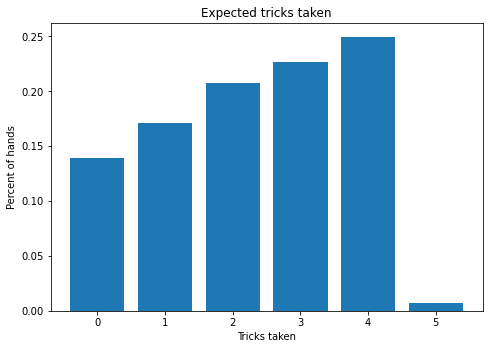

In [117]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
num_tricks_taken = ['0','1','2','3','4','5']
ax.bar(num_tricks_taken, single_hand_preds.tolist()[0])

plt.xlabel("Tricks taken")
plt.ylabel("Percent of hands")
plt.title("Expected tricks taken")

# ax.bar_label(trick_preds, label_type='center')

plt.show()

In [118]:
def plot_expected_tricks_taken(expected_tricks_taken):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(['0','1','2','3','4','5'], expected_tricks_taken)
    plt.xlabel("Tricks taken")
    plt.ylabel("Percent of hands")
    plt.title("Expected tricks taken")
    plt.show()

In [119]:
trick_preds = single_hand_preds.tolist()[0]
trick_preds

[0.1389676717676556,
 0.17065972991605802,
 0.2070717971461303,
 0.22679958623688826,
 0.24971621134846375,
 0.00678500358480401]

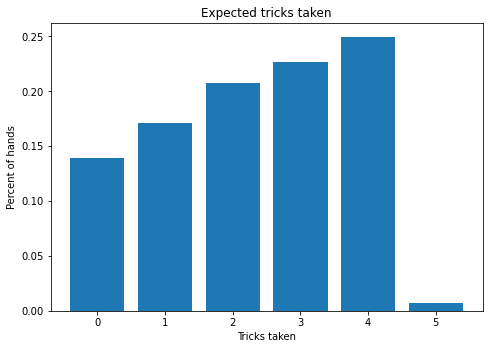

In [120]:
plot_expected_tricks_taken(expected_tricks_taken = trick_preds)

### Evalute model
Evaluate tricks taken against predicted tricks taken in test data set

#### CANNOT be evaluated using these functions against predict_proba output

In [121]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [122]:
mean_absolute_error(y_true=test_targets_df, y_pred=test_preds)

0.5987497640074678

In [123]:
mean_squared_error(y_true=test_targets_df, y_pred=test_preds)

0.871787879423549

In [124]:
r2_score(y_true=test_targets_df, y_pred=test_preds)

0.44361320894775114

In [125]:
test_targets_df[0:1]

156208    2
Name: tricks_won, dtype: int64

In [126]:
test_preds[0]

1

In [127]:
len(test_preds)

47671

#### Breakdown of percent of hands predicted correctly, 1 off, 2 off, etc.

In [128]:
results_dict = {str(num): 0 for num in range(0,6)}

#for idx, pred in enumerate(test_targets_df[0:100]):
for idx, pred in enumerate(test_targets_df):
    pred_diff = abs(pred - test_preds[idx])
    results_dict[str(pred_diff)] += 1

In [129]:
results_dict

{'0': 24410, '1': 18991, '2': 3459, '3': 623, '4': 175, '5': 13}

In [130]:
list(results_dict.values())

[24410, 18991, 3459, 623, 175, 13]

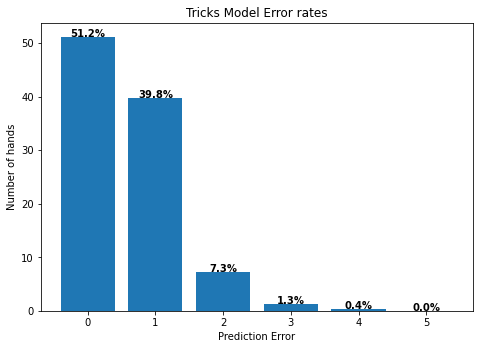

In [131]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
num_tricks_taken = ['0','1','2','3','4','5']
percents = [round(100.0*x / sum(results_dict.values()),1) for x in results_dict.values()]
graph = ax.bar(num_tricks_taken, percents)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    plt.text(x+width/2,
             y+height*1,
             str(percents[i])+'%',
             ha='center',
             weight='bold')
    i += 1

plt.xlabel("Prediction Error")
plt.ylabel("Number of hands")
plt.title("Tricks Model Error rates")

plt.show()

In [132]:
def plot_trick_error_rates(targets_list: list, 
                           preds_list: list):
    """
    Create bar plot of trick error rates on test preds
    
    :param: targets_list: list of actuals from test set
    :param: preds_list: list of predictions
    """
    results_dict = {str(num): 0 for num in range(0,6)}

    for idx, pred in enumerate(targets_list):
        pred_diff = abs(pred - preds_list[idx])
        results_dict[str(pred_diff)] += 1

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    percents = [round(100.0*x / sum(results_dict.values()),1) for x in results_dict.values()]
    graph = ax.bar(['0','1','2','3','4','5'], percents)

    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x,y = p.get_xy()
        plt.text(x+width/2,
                 y+height*1,
                 str(percents[i])+'%',
                 ha='center',
                 weight='bold')
        i += 1

    plt.xlabel("Prediction Error")
    plt.ylabel("Number of hands")
    plt.title("Tricks Model Error rates")

    plt.show()

#### Pipeline

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [134]:
categorical_columns = ['player_seat']
categorical_encoder = OneHotEncoder()

In [135]:
preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
    ],
)

In [136]:
rf = Pipeline(
    [
        ('preprocess', preprocessing),
        ('classifier', RandomForestClassifier(random_state=123))
    ]

)

In [137]:
#rf.fit(train_df, train_targets_df)

In [138]:
rf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['player_seat'])])),
                ('classifier', RandomForestClassifier(random_state=123))])

In [149]:
#single_hand_preds = rf.predict_proba(single_hand_test_df)
#single_hand_preds

## Next Steps

In [ ]:
# Build separate model for team tricks won

# Standardize input features to linear model
# Cross-validate tree-based models - RF, GBM, etc.
# sklearn pipeline

# PyTorch models
    # compare PyTorch version vs. sklearn
# Classification models to predict likelihood for each score outcome

# EUCHRE questions to answer:
# Is it possible to take a trick with an off-suit Jack, that wouldn't have been taken with the 10 or 9 ???

# Is there ever a time when knowing the current score of the game should affect which card to play?
    # If opponent has 9 points, play more aggressively?

# Is there ever a time when knowing the current number of tricks taken should affect which card to play?
    # If opponents have taken 2 tricks already, play more aggressively?

# HOW IS NUM_SUITS calculated???
   

### Write out all hand results to csv local

In [150]:
pwd

'C:\\Users\\jerem\\Desktop\\nonsense\\euchre'

In [151]:
all_hand_results_df = pd.read_csv('all_hand_results.csv')

In [152]:
all_hand_results_df.shape

(476716, 16)

In [157]:
hand_results_40k_df = all_hand_results_df.head(40000)
hand_results_40k_df.shape

(40000, 16)

In [158]:
hand_results_40k_df.to_csv('hand_results_40k.csv', index=False)